<a href="https://colab.research.google.com/github/mariskaiz/WebDevCollabProject/blob/main/TugasInd_ML_Mariska.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#inisiasi file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
# Install openpyxl dan pandas
!pip install openpyxl
!pip install pandas
# PURPOSE: to prevent any plot open in a new tab
%matplotlib inline
pd.pandas.set_option('display.max_column', None)

In [ ]:
#tampilkan data asli
df=pd.read_csv('/smoking_health_data_final.csv')
df.head(20)

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
0,54,male,yes,95,110/72,NaN,219.0
1,45,male,yes,64,121/72,NaN,248.0
2,58,male,yes,81,127.5/76,NaN,235.0
3,42,male,yes,90,122.5/80,NaN,225.0
4,42,male,yes,62,119/80,NaN,226.0
5,57,male,yes,62,107.5/72.5,NaN,223.0
6,43,male,yes,75,109.5/69,NaN,222.0
7,42,male,yes,66,123/73,NaN,196.0
8,37,male,yes,65,123.5/77,NaN,188.0
9,49,male,yes,93,127.5/81.5,NaN,256.0


In [ ]:
#pengecekan nilai kosong
print(sorted(df.isna().sum()))

[0, 0, 0, 0, 0, 7, 14]


In [ ]:
#pengecekan nilai statistik data
df.describe()

,age,heart_rate,cigs_per_day,chol
count,3900.000000,3900.000000,3886.000000,3893.000000
mean,49.537949,75.688974,9.168554,236.595941
std,8.559275,12.015376,12.037999,44.375365
min,32.000000,44.000000,0.000000,113.000000
25%,42.000000,68.000000,0.000000,206.000000
50%,49.000000,75.000000,0.000000,234.000000
75%,56.000000,82.000000,20.000000,263.000000
max,70.000000,143.000000,70.000000,696.000000


In [ ]:
nama_kolom = 'cigs_per_day'
databaru = df.drop(columns=[nama_kolom])
print(databaru)

      age   sex current_smoker  heart_rate blood_pressure   chol
0      54  male            yes          95         110/72  219.0
1      45  male            yes          64         121/72  248.0
2      58  male            yes          81       127.5/76  235.0
3      42  male            yes          90       122.5/80  225.0
4      42  male            yes          62         119/80  226.0
...   ...   ...            ...         ...            ...    ...
3895   37  male            yes          88     122.5/82.5  254.0
3896   49  male            yes          70         123/75  213.0
3897   56  male            yes          70         125/79  246.0
3898   50  male            yes          85         134/95  340.0
3899   40  male            yes          98         132/86  210.0

[3900 rows x 6 columns]


In [30]:
#pengecekan data baru
print("jumlah baris dan kolom")
print(databaru.shape)
print(sorted(df.isna().sum()))


jumlah baris dan kolom
(3900, 6)
[0, 0, 0, 0, 0, 7, 14]


In [31]:
print (databaru.describe())

               age   heart_rate         chol
count  3900.000000  3900.000000  3893.000000
mean     49.537949    75.688974   236.595941
std       8.559275    12.015376    44.375365
min      32.000000    44.000000   113.000000
25%      42.000000    68.000000   206.000000
50%      49.000000    75.000000   234.000000
75%      56.000000    82.000000   263.000000
max      70.000000   143.000000   696.000000


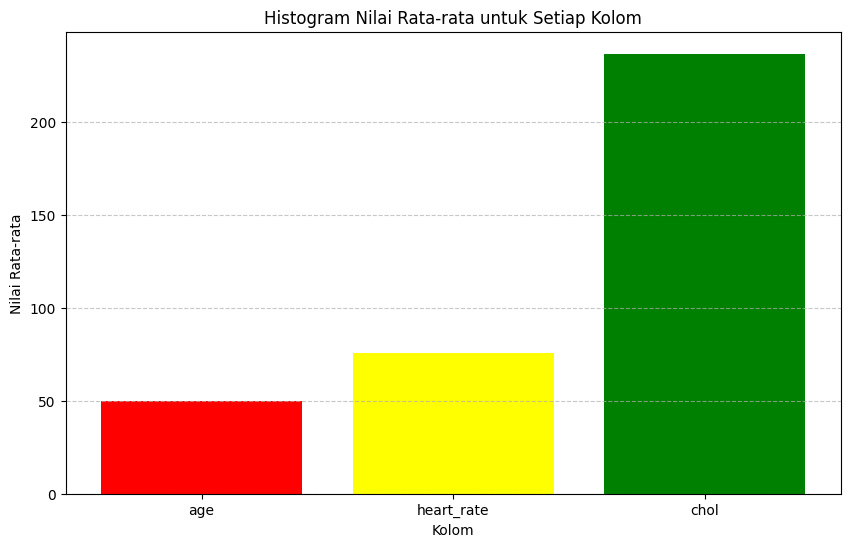

In [33]:
#visualisasi data
#data statistik
data_statistik = {
    'age' : 49.537949,
    'heart_rate' : 75.688974,
    'chol' : 236.595941
}

#membuat dataframe
df = pd.DataFrame(data_statistik, index=[0])

#membuat histogram
plt.figure(figsize=(10, 6))
plt.bar(df.columns, df.values.flatten(), color=['red', 'yellow', 'green'])
plt.xlabel('Kolom')
plt.ylabel('Nilai Rata-rata')
plt.title('Histogram Nilai Rata-rata untuk Setiap Kolom')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

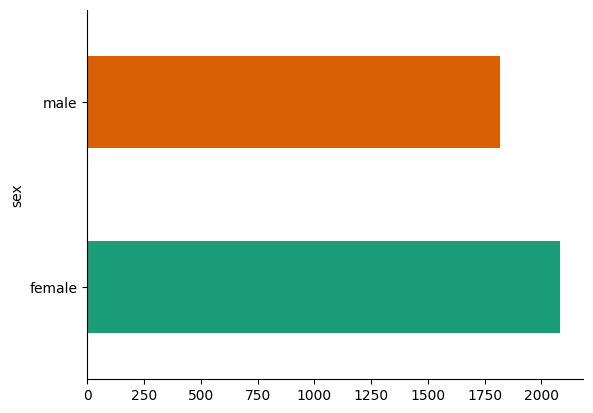

In [36]:
#visualisasi gender
from matplotlib import pyplot as plt
import seaborn as sns
databaru.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-40-731327889ed5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(databaru, x='age', y='sex', inner='stick', palette='Dark2')


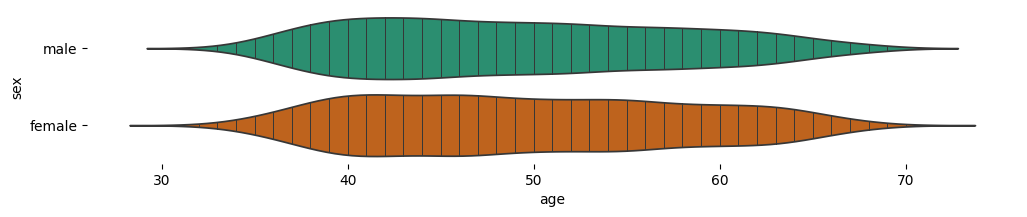

In [40]:
#visualisasi data sebelum feature sclain
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1 * len(databaru['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(databaru, x='age', y='sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)


In [41]:
#menyimpan dataset baru
databaru.to_csv(' Data_Perokok.csv', index=False)

In [42]:
#feature scaling min max
from sklearn.preprocessing import MinMaxScaler

data_Featurescaling = databaru
# Memilih variabel numerik untuk feature scaling
numerical_features = ['age', 'heart_rate', 'chol']
# Min-Max Scaling
scaler = MinMaxScaler()
data_Featurescaling[numerical_features] = scaler.fit_transform(data_Featurescaling[numerical_features])
print(data_Featurescaling)

           age   sex current_smoker  heart_rate blood_pressure      chol
0     0.578947  male            yes    0.515152         110/72  0.181818
1     0.342105  male            yes    0.202020         121/72  0.231561
2     0.684211  male            yes    0.373737       127.5/76  0.209262
3     0.263158  male            yes    0.464646       122.5/80  0.192110
4     0.263158  male            yes    0.181818         119/80  0.193825
...        ...   ...            ...         ...            ...       ...
3895  0.131579  male            yes    0.444444     122.5/82.5  0.241852
3896  0.447368  male            yes    0.262626         123/75  0.171527
3897  0.631579  male            yes    0.262626         125/79  0.228130
3898  0.473684  male            yes    0.414141         134/95  0.389365
3899  0.210526  male            yes    0.545455         132/86  0.166381

[3900 rows x 6 columns]


In [43]:
print (data_Featurescaling.describe())

               age   heart_rate         chol
count  3900.000000  3900.000000  3893.000000
mean      0.461525     0.320091     0.212000
std       0.225244     0.121367     0.076116
min       0.000000     0.000000     0.000000
25%       0.263158     0.242424     0.159520
50%       0.447368     0.313131     0.207547
75%       0.631579     0.383838     0.257290
max       1.000000     1.000000     1.000000


<ipython-input-44-e60e3d4302e2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data_Featurescaling, x='age', y='sex', inner='stick', palette='Dark2')


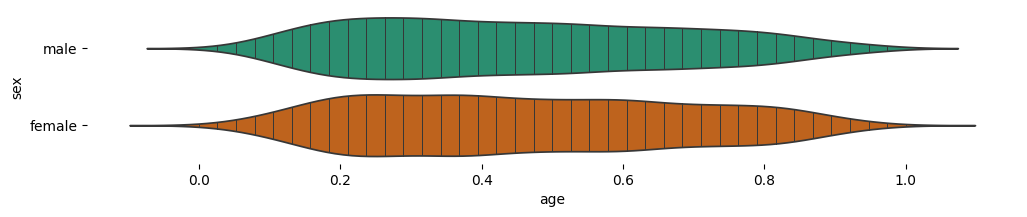

In [44]:
#visualisasi data setelah feature scaling

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1 * len(data_Featurescaling['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data_Featurescaling, x='age', y='sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [45]:
#menyimpan dataset baru yang sudah di feature scaling
databaru.to_csv(' Data_Perokok_2.csv', index=False)
